In [92]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

import seaborn as sns

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2022, 2, 22, 8, 40, 43, 695720)

In [4]:
now.isoformat()

'2022-02-22T08:40:43.695720'

In [5]:
from datetime import timedelta

year = timedelta(days=365)
year

datetime.timedelta(days=365)

In [6]:
year * 10

datetime.timedelta(days=3650)

In [7]:
now.strftime("%A %d. %B %Y")

'Tuesday 22. February 2022'

In [8]:
pd.date_range(start="2021-03-24", end="2021-09-01")

DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
               '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=162, freq='D')

In [9]:
df = pd.DataFrame({"year": [2021, 2022], "month": [3, 4], "day": [24, 25]})
df

,year,month,day
0,2021,3,24
1,2022,4,25


In [10]:
ts1 = pd.to_datetime(df)

In [11]:
ts2 = pd.to_datetime("20210324", format="%Y%m%d")

In [12]:
ts1.values[0]

numpy.datetime64('2021-03-24T00:00:00.000000000')

In [13]:
type(ts2)

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
pd.Series(pd.date_range("2021", freq="1M", periods=3))

0   2021-01-31
1   2021-02-28
2   2021-03-31
dtype: datetime64[ns]

In [15]:
s = pd.Series([1, 2, 3, 4, 5])

In [16]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [17]:
s.rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

In [18]:
s.rolling(3).mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [19]:
import numpy as np

<AxesSubplot:>

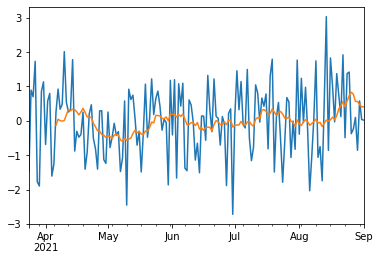

In [20]:
rng = pd.date_range("2021-03-24", "2021-09-01", freq="D")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.plot()
ts.rolling(14).mean().plot()

In [21]:
ts.head()

2021-03-24   -1.466694
2021-03-25    0.894661
2021-03-26    0.701227
2021-03-27    1.733055
2021-03-28   -1.771668
Freq: D, dtype: float64

<AxesSubplot:>

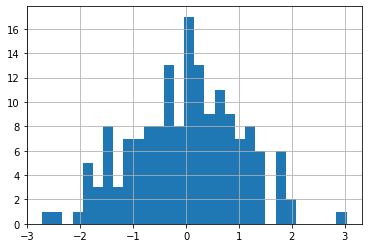

In [22]:
ts.hist(bins=30)

<AxesSubplot:>

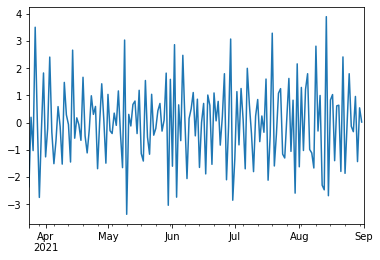

In [23]:
diff_ts = ts - ts.shift(-1)
diff_ts.plot()

In [24]:
ts

2021-03-24   -1.466694
2021-03-25    0.894661
2021-03-26    0.701227
2021-03-27    1.733055
2021-03-28   -1.771668
                ...   
2021-08-28    0.100210
2021-08-29   -0.859000
2021-08-30    0.577905
2021-08-31    0.038027
2021-09-01    0.020163
Freq: D, Length: 162, dtype: float64

In [25]:
ts.asfreq("M")

2021-03-31    1.134211
2021-04-30   -1.238609
2021-05-31    1.178701
2021-06-30   -2.722207
2021-07-31    1.768310
2021-08-31    0.038027
Freq: M, dtype: float64

In [26]:
ts.mean() + (ts.std() / np.sqrt(len(ts))) * 3

0.2440282652660383

In [47]:
pollution = pd.read_csv(
    "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv"
)

In [48]:
pollution.head()

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [49]:
pollution = pollution.rename(
    columns={
        "Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))": "SPM",
        "Smoke (Fouquet and DPCC (2011))": "Smoke",
        "Entity": "City",
    }
)
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [50]:
pollution.City.unique()

array(['Delhi', 'London'], dtype=object)

In [51]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [52]:
pollution["Year"] = pollution["Year"].apply(lambda x: datetime.strptime(str(x), "%Y"))
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [53]:
pollution.isnull().mean()

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [54]:
pollution.describe()

,Smoke,SPM
count,301.000000,331.000000
mean,210.296440,365.970050
std,88.543288,172.512674
min,13.750000,15.000000
25%,168.571429,288.474026
50%,208.214286,375.324675
75%,291.818182,512.609209
max,342.857143,623.376623


Text(0, 0.5, 'Frequency')

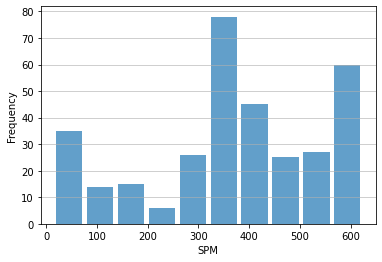

In [55]:
n, bins, patches = plt.hist(x=pollution["SPM"], bins="auto", alpha=0.7, rwidth=0.85)
plt.grid(axis="y", alpha=0.75)
plt.xlabel("SPM")
plt.ylabel("Frequency")

In [56]:
from scipy import stats

In [57]:
def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

In [58]:
stats.pearsonr(*ignore_nans(pollution["Smoke"], pollution["SPM"]))

(0.9999999999999999, 0.0)

<Figure size 864x432 with 0 Axes>

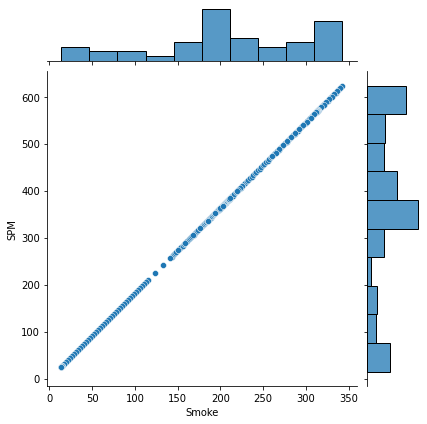

In [59]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.jointplot(x="Smoke", y="SPM", edgecolor="white", data=pollution)
plt.xlabel("Smoke")
plt.ylabel("SPM")

plt.show()

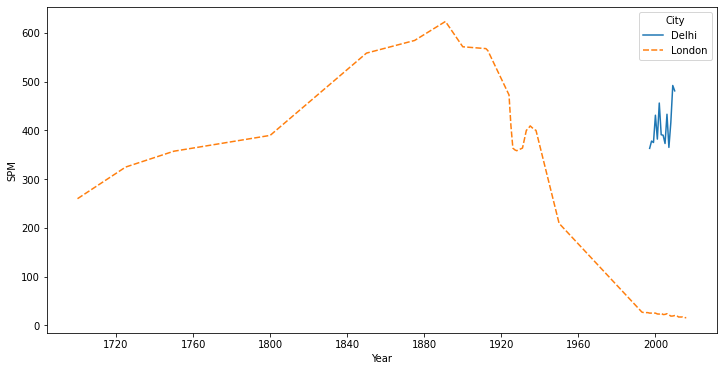

In [83]:
pollution_pivoted = pollution.pivot("Year", "City", "SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_pivoted)
plt.ylabel("SPM")
plt.show()

In [64]:
pollution_pivoted.head()

City,Delhi,London
Year,,
1700-01-01,NaN,259.740260
1701-01-01,NaN,262.337662
1702-01-01,NaN,264.935065
1703-01-01,NaN,267.532467
1704-01-01,NaN,270.129870


In [63]:
pollution.head()

,City,Year,Smoke,SPM
0,Delhi,1997-01-01,NaN,363.0
1,Delhi,1998-01-01,NaN,378.0
2,Delhi,1999-01-01,NaN,375.0
3,Delhi,2000-01-01,NaN,431.0
4,Delhi,2001-01-01,NaN,382.0


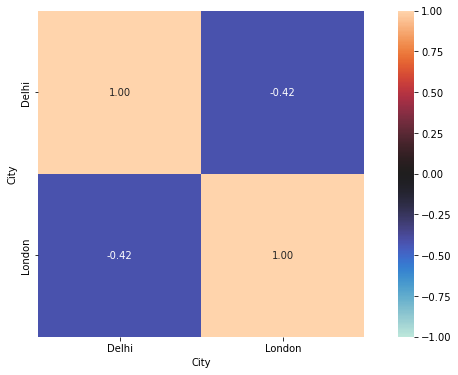

{'corr': City       Delhi    London
 City                      
 Delhi   1.000000 -0.415809
 London -0.415809  1.000000,
 'ax': <AxesSubplot:xlabel='City', ylabel='City'>}

In [67]:
import dython

dython.nominal.associations(pollution_pivoted, figsize=(12, 6))

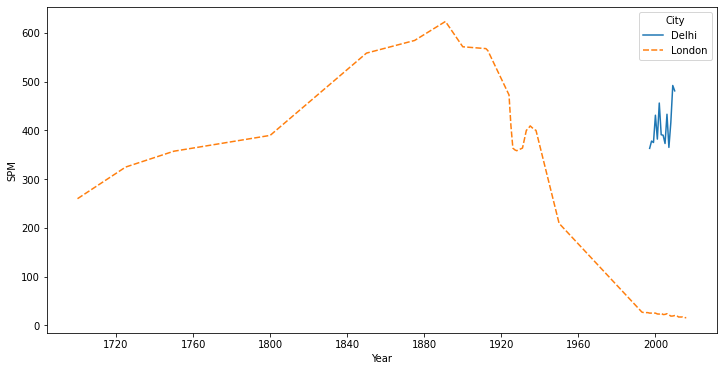

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution_pivoted)
plt.ylabel("SPM")

In [69]:
stats.spearmanr(*ignore_nans(pollution["Smoke"], pollution["SPM"]))

SpearmanrResult(correlation=1.0, pvalue=0.0)

## Identifying trend and seasonality

In [86]:
temperatures = pd.read_csv("../data/monthly_csv.csv")
temperatures["Date"] = pd.to_datetime(temperatures["Date"])
temperatures_pivoted = temperatures.pivot("Date", "Source", "Mean")
temperatures_pivoted.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [96]:
from numpy import polyfit


def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

In [97]:
def get_season(s, yearly_periods=4, degree=3):
    X = [i % (365 / 4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

In [98]:
def get_trend(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

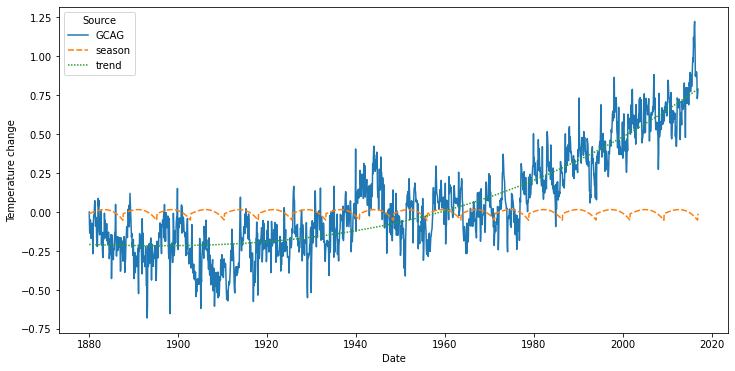

In [100]:
plt.figure(figsize=(12, 6))
temperatures_pivoted["trend"] = get_trend(temperatures_pivoted["GCAG"])
temperatures_pivoted["season"] = get_season(
    temperatures_pivoted["GCAG"] - temperatures_pivoted["trend"]
)
sns.lineplot(data=temperatures_pivoted[["GCAG", "season", "trend"]])
plt.ylabel("Temperature change")
plt.show()

In [115]:
from statsmodels.tsa.seasonal import STL
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [119]:
trend_df = pd.DataFrame()
data = temperatures_pivoted.resample("M").mean().ffill()
data.index = [i for i in range(data.shape[0])]
data.head()

Source,GCAG,GISTEMP,trend,season
0,0.0009,-0.30,-0.207448,-0.010461
1,-0.1229,-0.21,-0.207531,-0.009336
2,-0.1357,-0.18,-0.207613,-0.008226
3,-0.0499,-0.27,-0.207695,-0.007131
4,-0.0738,-0.14,-0.207777,-0.006051


GCAG


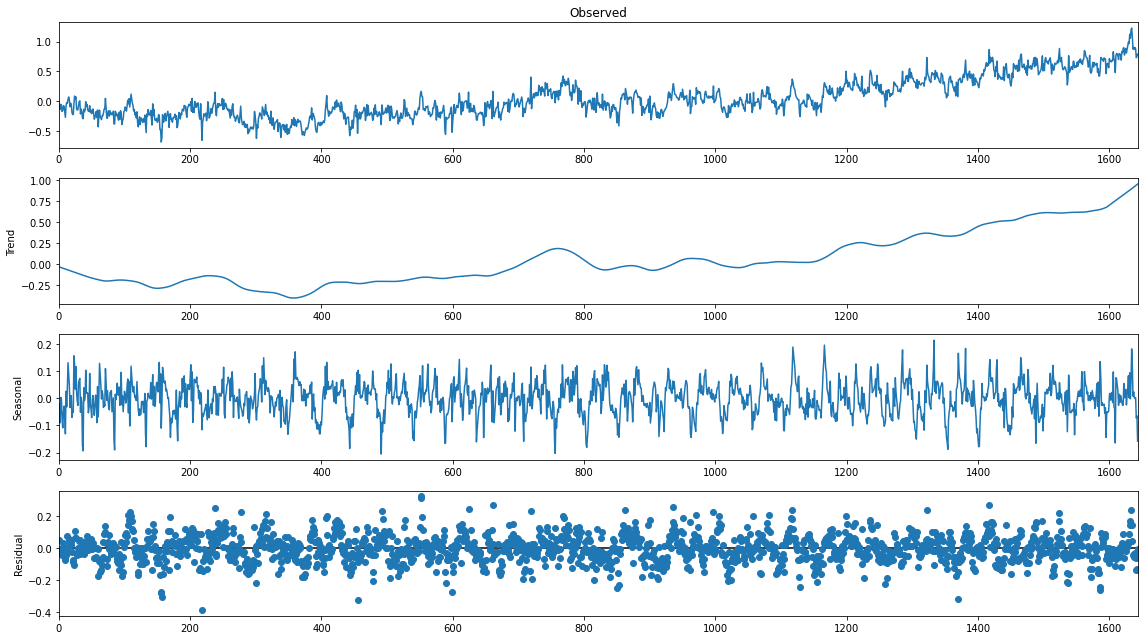

In [138]:
for temperature_type in ["GCAG"]:
    print(temperature_type)
    stl = STL(data[temperature_type].values, period=48)

    res = stl.fit()

    fig = res.plot()
    fig.set_size_inches((16, 9))
    # Tight layout to re-align
    fig.tight_layout()
    plt.show()

## Autocorrelation

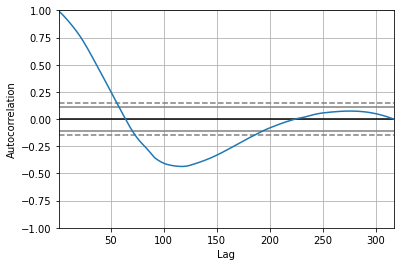

In [136]:
pd.plotting.autocorrelation_plot(pollution_pivoted["London"])
plt.show()

### augmented Dickey–Fuller test

In [139]:
from statsmodels.tsa import stattools

stattools.adfuller(pollution_pivoted["London"])

(-0.3372164080424281,
 0.9200654843183897,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

* adf : float
    The test statistic.
* pvalue : float
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010).

* null hypothesis: series is NOT stationary because the unit root is present
* p-value < 0.05 ---> reject null hypothesis
* Here, p-value is 0.92 --> accept null hypothesis
* It is NOT stationary

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn.datasets import fetch_openml

In [75]:
eeg = fetch_openml(data_id=1471, as_frame=True)
increment = 117 / len(eeg["data"])

In [76]:
import numpy as np

index = np.linspace(start=0, stop=increment * len(eeg["data"]), num=len(eeg["data"]))

In [77]:
ts_index = pd.to_datetime(index, unit="s")
v1 = pd.Series(name="V1", data=eeg["data"]["V1"].values, index=ts_index)

In [79]:
slicing = (v1.index >= "1970-01-01 00:00:08") & (
    v1.index <= "1970-01-01 00:01:10.000000000"
)
v1[slicing]

1970-01-01 00:00:08.006208692    4289.74
1970-01-01 00:00:08.014019627    4284.10
1970-01-01 00:00:08.021830562    4280.00
1970-01-01 00:00:08.029641498    4289.74
1970-01-01 00:00:08.037452433    4298.46
                                  ...   
1970-01-01 00:01:09.962547566    4289.74
1970-01-01 00:01:09.970358501    4283.08
1970-01-01 00:01:09.978169437    4284.62
1970-01-01 00:01:09.985980372    4289.23
1970-01-01 00:01:09.993791307    4290.77
Name: V1, Length: 7937, dtype: float64

Text(0, 0.5, 'voltage')

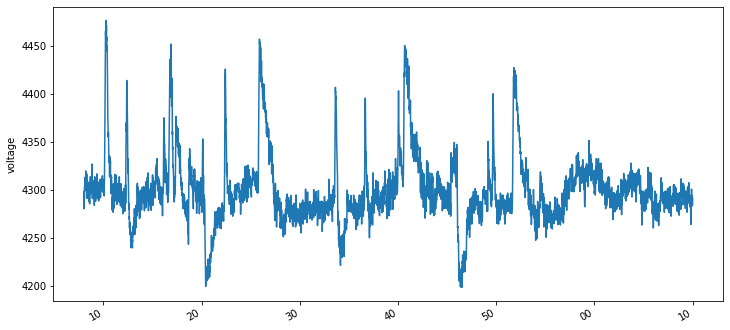

In [80]:
date_formatter = DateFormatter("%S")
ax = v1[slicing].plot(figsize=(12, 6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel("voltage")

Text(0.5, 0, 'seconds')

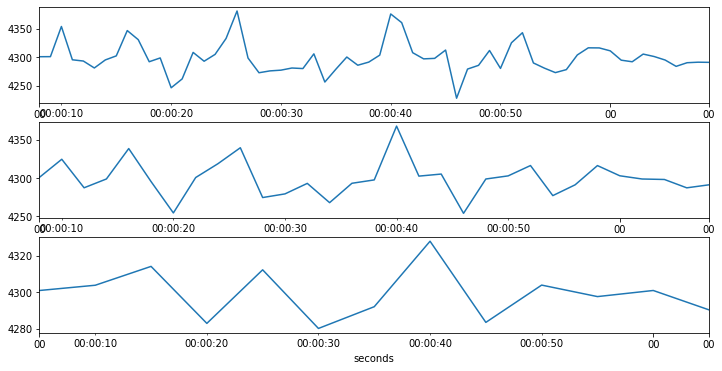

In [81]:
plt.subplot(311)
ax1 = v1[slicing].resample("1s").mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(312)
ax1 = v1[slicing].resample("2s").mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(313)
ax2 = v1[slicing].resample("5s").mean().plot(figsize=(12, 6))
ax2.xaxis.set_major_formatter(date_formatter)
plt.xlabel("seconds")

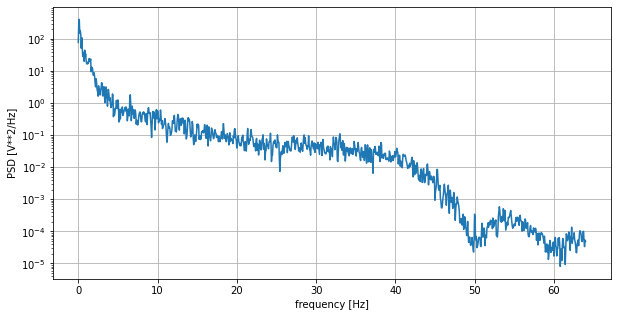

In [142]:
from scipy import signal

fig, ax = plt.subplots(figsize=[10, 5])
fs = len(eeg["data"]) // 117
f, Pxx_den = signal.welch(v1[slicing].values, fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx_den)
plt.grid()
plt.xlabel("frequency [Hz]")
plt.ylabel("PSD [V**2/Hz]")
plt.show()